# Data Handling, Preprocessing and Probability & Statistics for Machine Learning

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [98]:
df = pd.read_csv('Data\Loan Prediction data .csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [100]:
len(df)

614

In [101]:
len(df.columns)

13

In [102]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

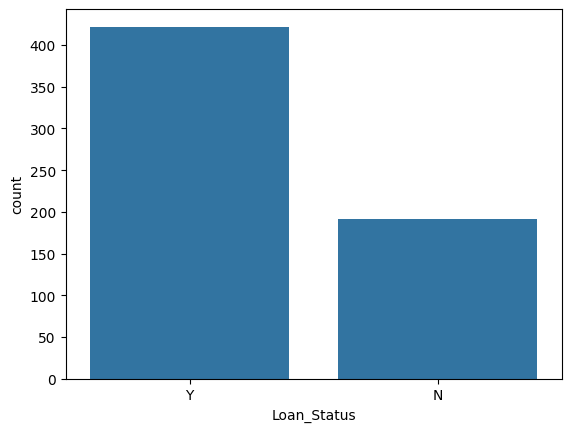

In [103]:
plt.Figure(figsize=(8,6))
sns.countplot(x ='Loan_Status', data = df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

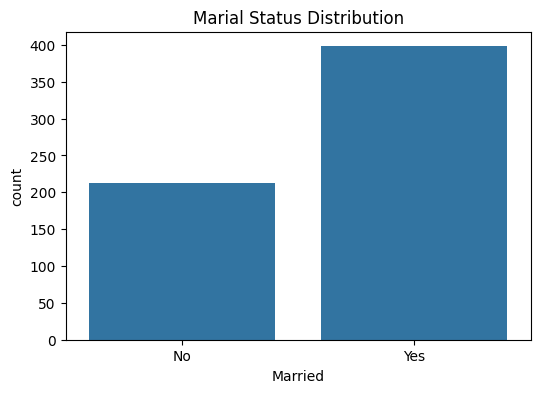

In [104]:

plt.figure(figsize=(6,4))
sns.countplot(x= 'Married', data = df, )
plt.title('Marial Status Distribution')
plt.show

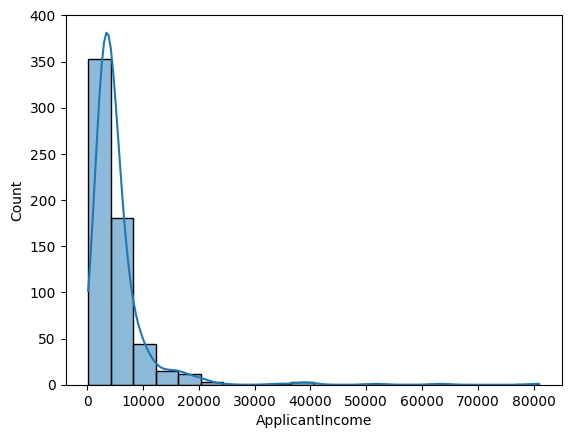

In [105]:
plt.Figure(figsize=(8,6))
sns.histplot(df['ApplicantIncome'], bins=20, kde=True)
plt.show()

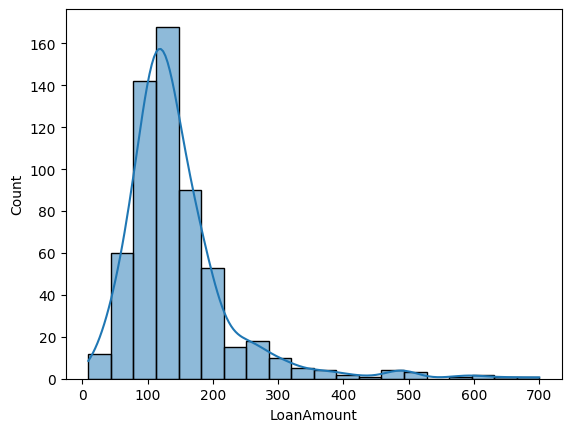

In [106]:
plt.Figure(figsize=(8,6))
sns.histplot(df['LoanAmount'], bins=20, kde=True)
plt.show()

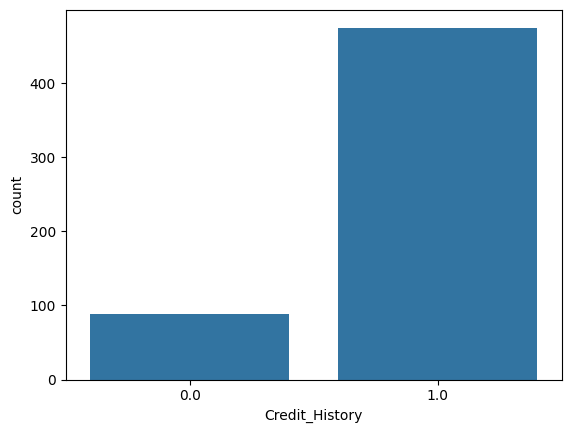

In [107]:
plt.Figure(figsize=(8,6))
sns.countplot(x ='Credit_History', data = df)
plt.show()

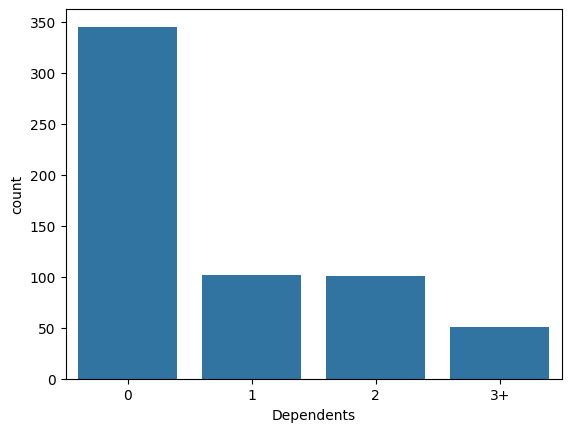

In [108]:
plt.Figure(figsize=(8,6))
sns.countplot(x ='Dependents', data = df)
plt.show()

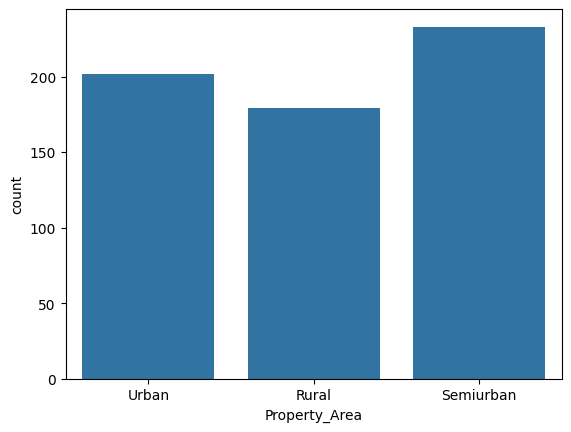

In [109]:
plt.Figure(figsize=(8,6))
sns.countplot(x ='Property_Area', data = df)
plt.show()

Text(0.5, 1.0, 'Impact of Education to Loan Approvals')

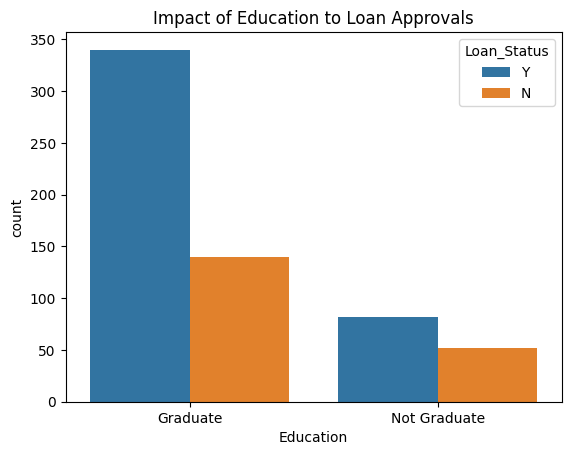

In [110]:
sns.countplot(data=df, x = "Education", hue="Loan_Status")
plt.title("Impact of Education to Loan Approvals")

Text(0.5, 1.0, 'Loan Approval Trends by Gender')

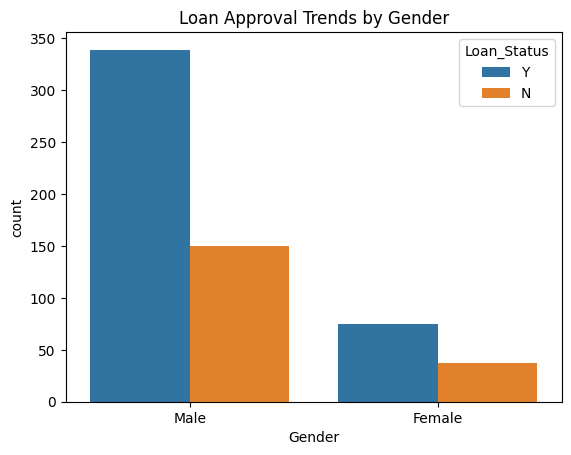

In [111]:
# Starting with gender
sns.countplot(data=df, x = "Gender", hue="Loan_Status")
plt.title("Loan Approval Trends by Gender")

In [112]:
df_copy1 =df.copy()
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Data cleaning

## Deletion
**Loan_ID**:  Is a unique identifier, meaning that it doesn't carry any meaningful pattern or trend that helps in predicting. Removing this column would also help with Transparency.

The rest of the columns seem relevant for the loan prediction model because they contributeto assessing a borrower's creditworthiness.



In [113]:
if 'Loan_ID' in df_copy1.columns:
	df_copy1.drop(['Loan_ID'], axis=1, inplace=True)
df_copy1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [114]:
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [115]:
categorical_cols =df_copy1.select_dtypes(include=["object"]).columns
print(categorical_cols)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')


In [116]:
df_copy1.isnull().sum() #show missing values per column

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Encoding Categorical Values

### Categorical Values
Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status

In [117]:
from sklearn.preprocessing import LabelEncoder
cat_features=  ['Gender','Credit_History','Education', 'Married','Dependents','Self_Employed','Property_Area','Loan_Status']
encoder = LabelEncoder()
for col in cat_features:
    df_copy1[col] = encoder.fit_transform(df_copy1[col])
df_copy1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1


## Empty cells
#### Categorical Values
**Solution:** Mode Imputation

In [118]:
for col in cat_features:
    df_copy1[col].fillna(df_copy1[col].mode()[0], inplace=True)
df_copy1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1,2,1


In [119]:
df_copy1.isnull().sum() #show missing values per column

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

For Numerial formats we are going to to use mean inputation to handle the missing values

In [120]:
num_features = ['LoanAmount','Loan_Amount_Term']

In [121]:
for col in num_features:
    df_copy1[col].fillna(df_copy1[col].mean(), inplace=True)
df_copy1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1,2,1


In [122]:
df_copy1.isnull().sum() #show missing values per column

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [123]:
df_copy1.duplicated().sum()
#no duplicates

np.int64(0)

In [124]:
df_copy1.nunique()

Gender                 3
Married                3
Dependents             5
Education              2
Self_Employed          3
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

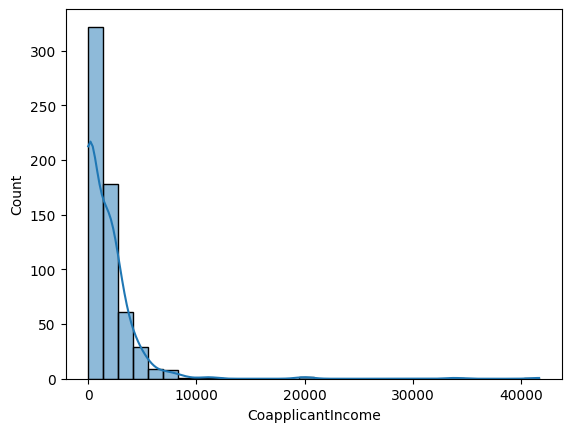

In [125]:
plt.Figure(figsize=(8,6))
sns.histplot(df['CoapplicantIncome'], bins=30, kde=True)
plt.show()

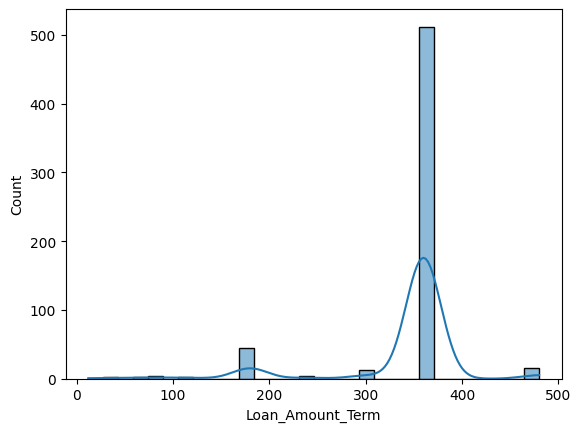

In [126]:
plt.Figure(figsize=(8,6))
sns.histplot(df['Loan_Amount_Term'], bins=30, kde=True)
plt.show()

In [127]:
df_copy1.skew().sort_values(ascending=False)

CoapplicantIncome    7.491531
ApplicantIncome      6.539513
LoanAmount           2.726601
Self_Employed        2.191118
Education            1.367622
Dependents           1.089068
Property_Area       -0.066196
Credit_History      -0.199751
Married             -0.538097
Loan_Status         -0.809998
Gender              -0.953015
Loan_Amount_Term    -2.389680
dtype: float64

### Log Transformation
This is effective for reducing right-skewness in data

CoapplicantIncome, ApplicantIncome, LoanAmount, Self_Employed, Education, Dependents

In [128]:
df_possitive = df_copy1[["CoapplicantIncome", "ApplicantIncome", "LoanAmount", "Self_Employed", "Education", "Dependents"]].apply(lambda x:np.log(x))

In [129]:
from scipy import stats
import pandas as pd

# Function to apply Box-Cox transformation safely
def boxcox_transform(column):
    # Ensure the column is numeric
    if pd.api.types.is_numeric_dtype(column):
        # Check for positive values
        if (column > 0).all() and column.nunique() > 1:
            transformed, _ = stats.boxcox(column)  # No need to add 1 if already positive
            return transformed
    return column  # Return original column if transformation cannot be applied

# Apply the transformation
df_copy1 = df_copy1.apply(boxcox_transform)


In [130]:
df_copy1.skew().sort_values(ascending=False)

CoapplicantIncome    7.491531
Self_Employed        2.191118
Education            1.367622
Dependents           1.089068
Loan_Amount_Term     0.385839
LoanAmount           0.030458
Property_Area       -0.066196
ApplicantIncome     -0.092513
Credit_History      -0.199751
Married             -0.538097
Loan_Status         -0.809998
Gender              -0.953015
dtype: float64

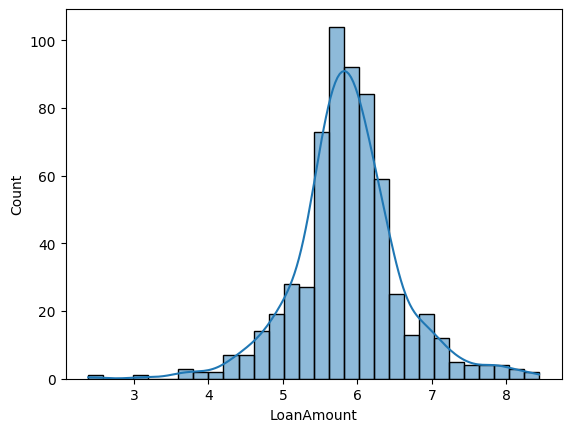

In [131]:
plt.Figure(figsize=(8,6))
sns.histplot(df_copy1['LoanAmount'], bins=30, kde=True)
plt.show()

# Removing Outliers
1. Outlier detection

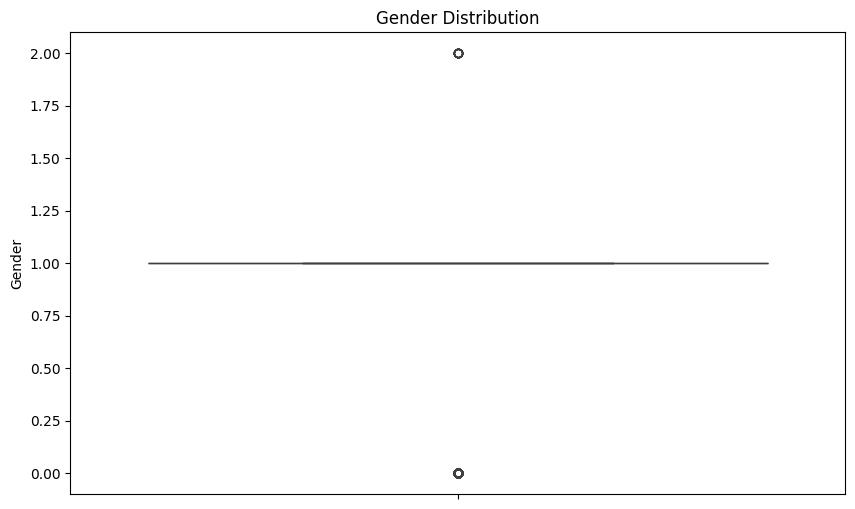

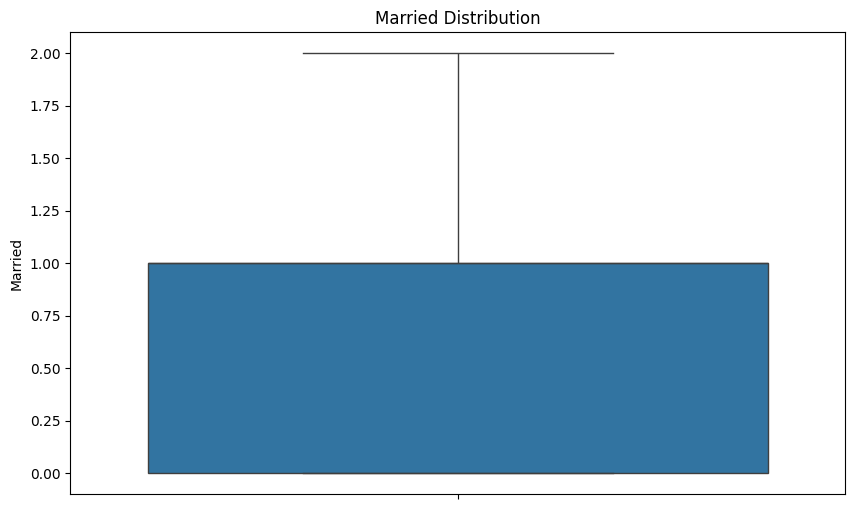

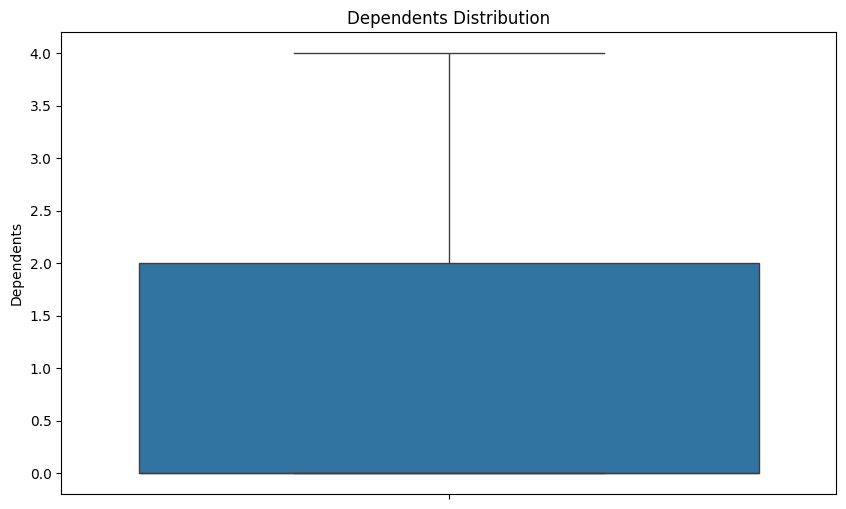

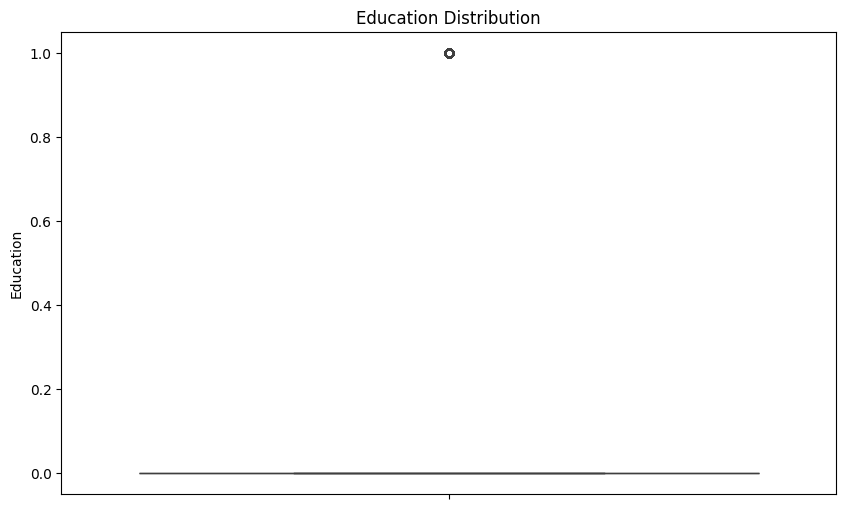

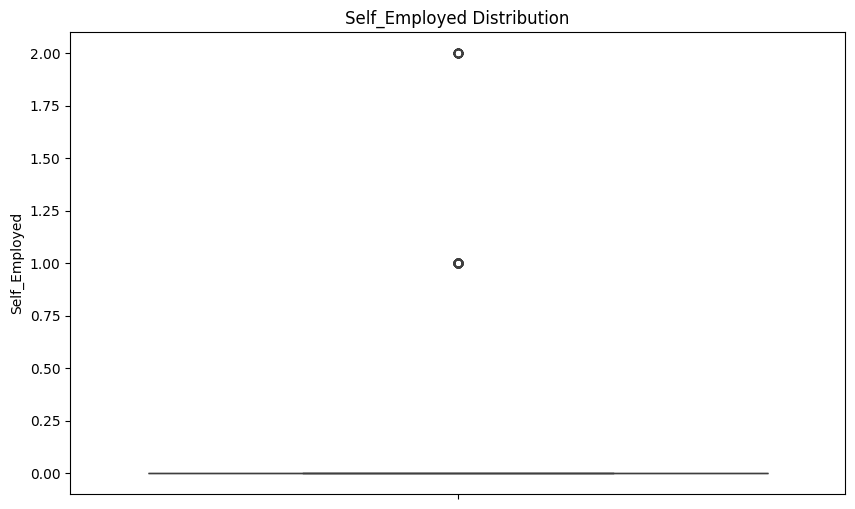

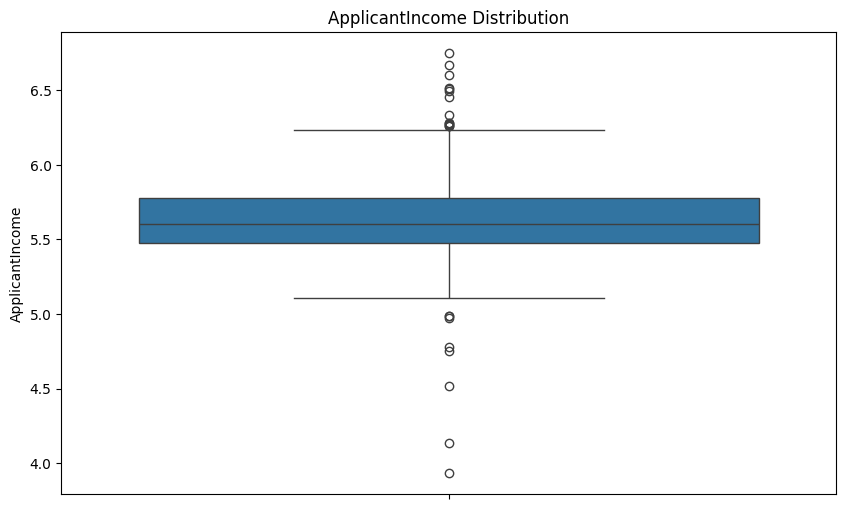

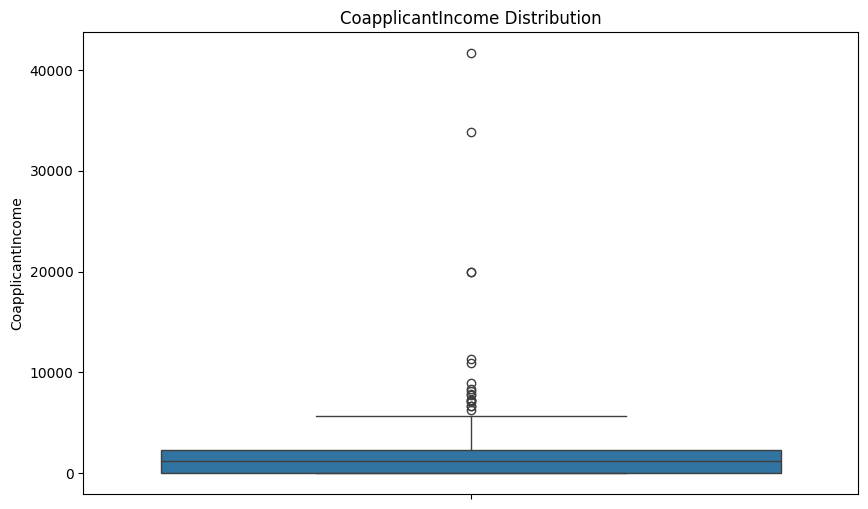

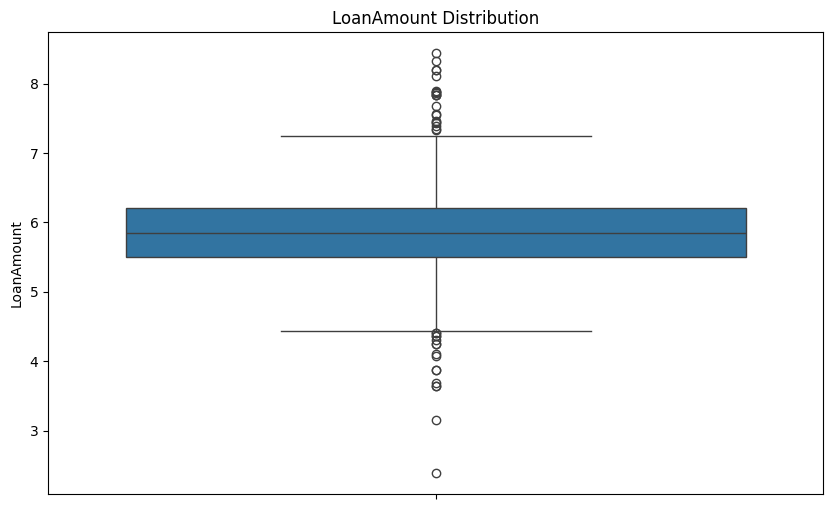

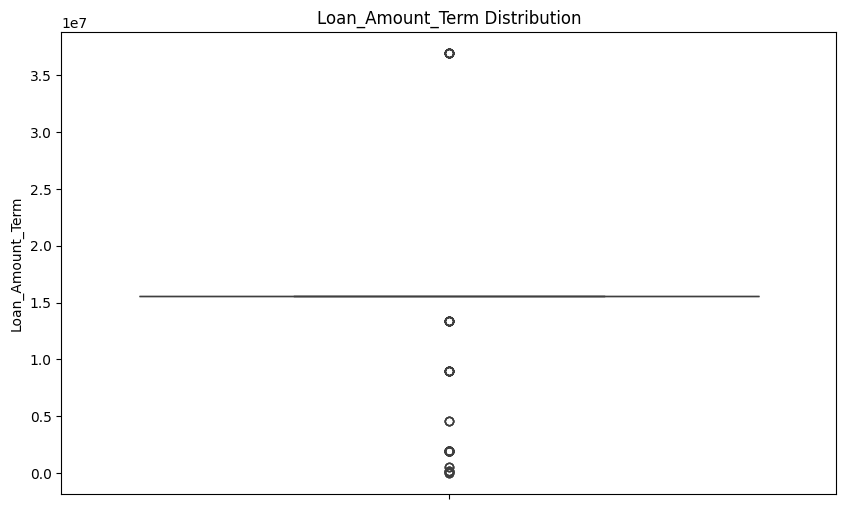

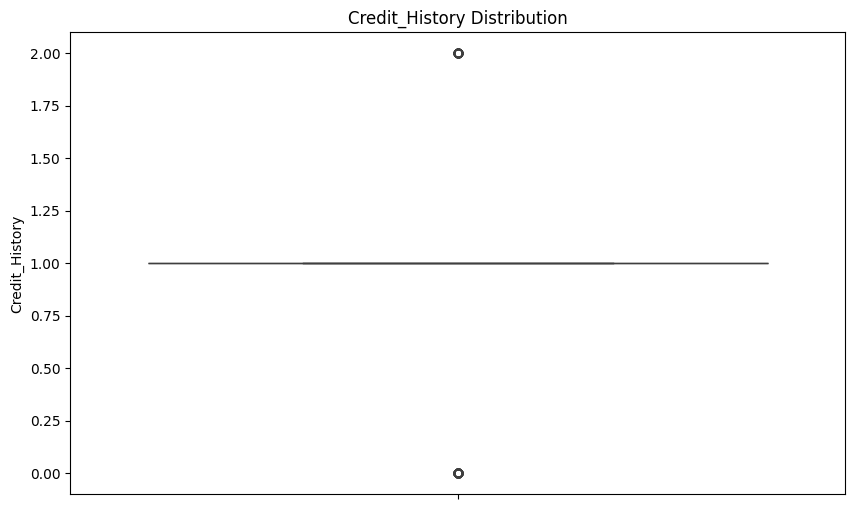

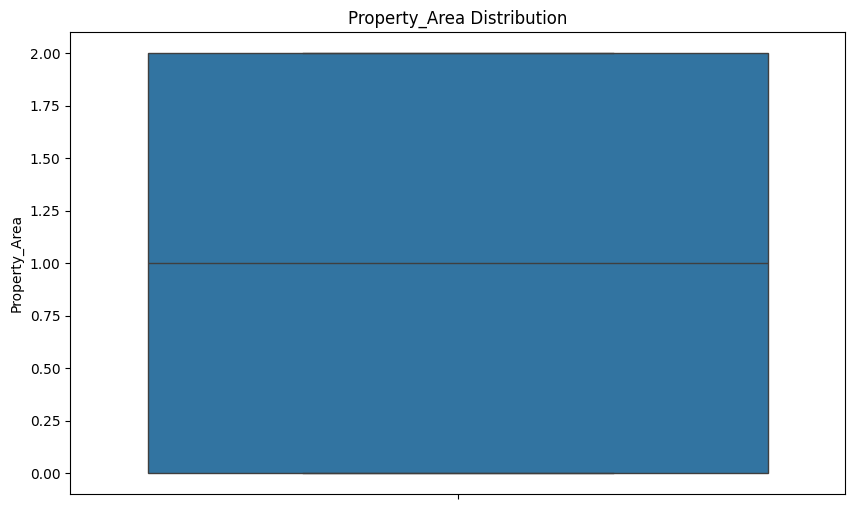

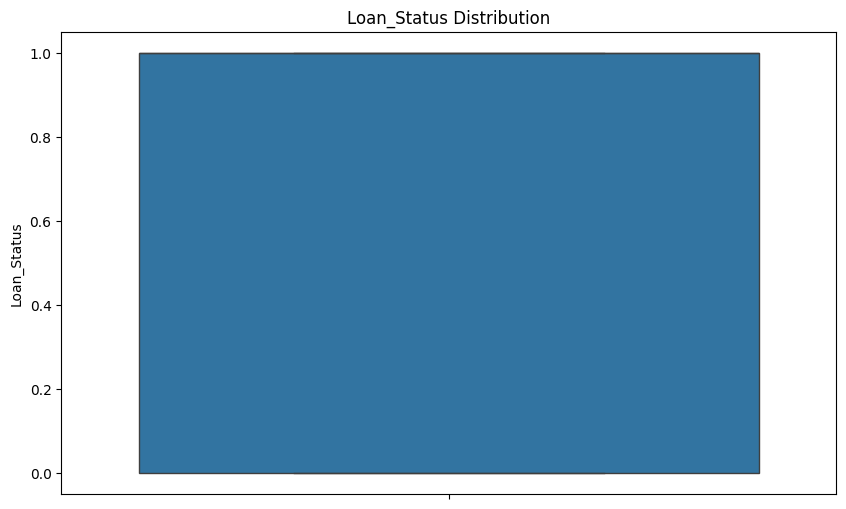

In [132]:

for i in df_copy1:

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_copy1[i])
    plt.xticks(rotation=45)
    plt.title(f"{i} Distribution")
    plt.show()

ApplicantIncome
Self_Employed
Education
Credit_History
CoapplicantIncome
Gender


In [133]:
print(df['Gender'].value_counts())

Gender
Male      489
Female    112
Name: count, dtype: int64


In [134]:
df_with_outlier = ["ApplicantIncome",
"Self_Employed"
,"Education"
,"Credit_History",
"CoapplicantIncome"

]

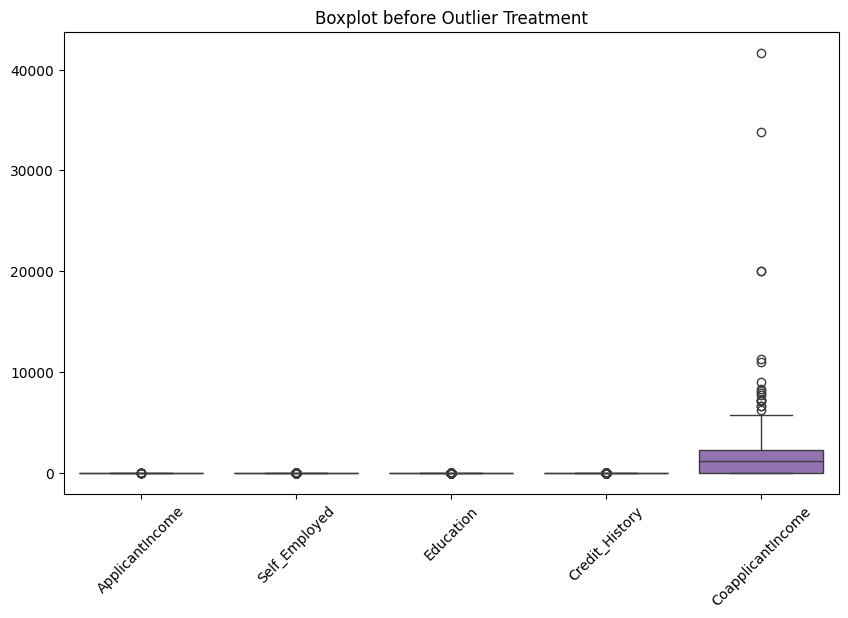

In [135]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy1[df_with_outlier])
plt.xticks(rotation=45)
plt.title("Boxplot before Outlier Treatment")
plt.show()

In [136]:
Q1 = df_copy1[df_with_outlier].quantile(0.25)
Q3 = df_copy1[df_with_outlier].quantile(0.75)
IQR = Q3 -Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for col in df_with_outlier:
    df_copy1[col] = df_copy1[col].clip(lower_bound[col], upper_bound[col])



In [137]:
print(df['Gender'].value_counts())

Gender
Male      489
Female    112
Name: count, dtype: int64


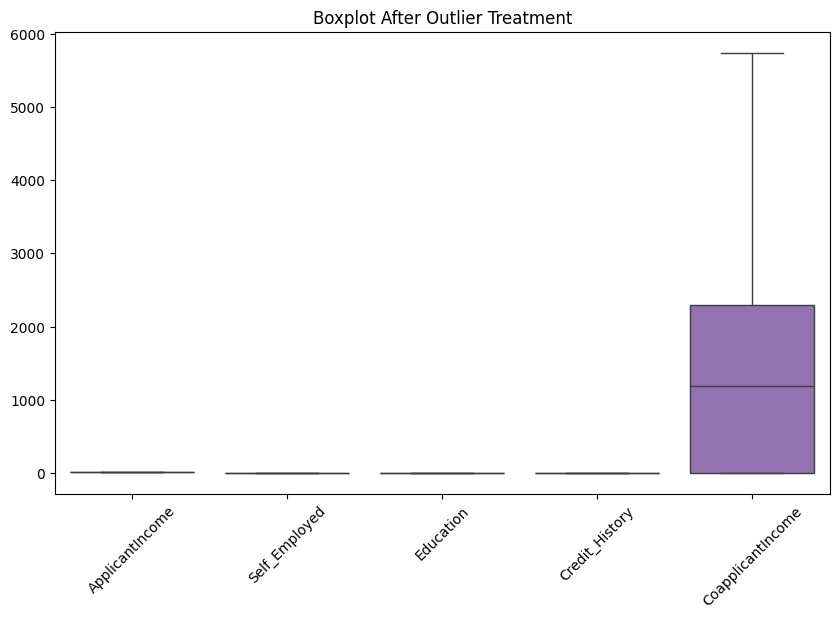

In [138]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy1[df_with_outlier])
plt.xticks(rotation=45)
plt.title("Boxplot After Outlier Treatment")
plt.show()

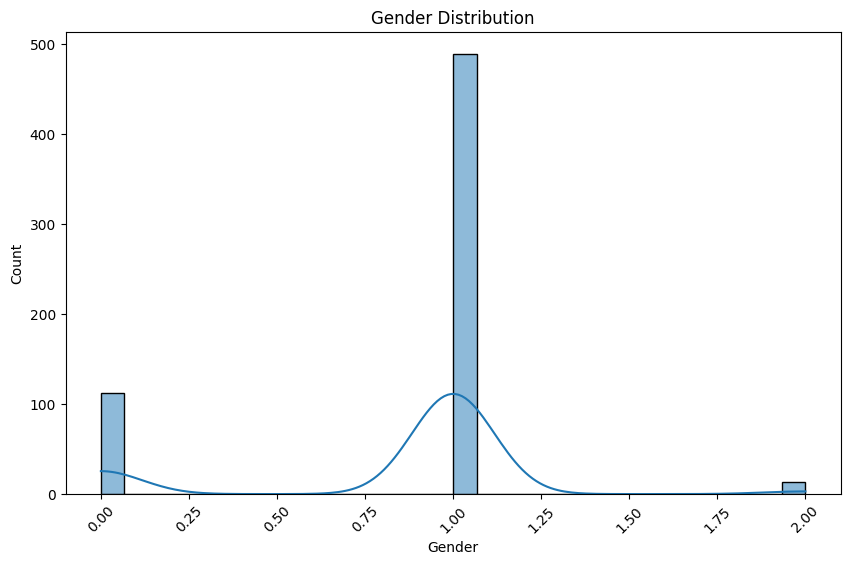

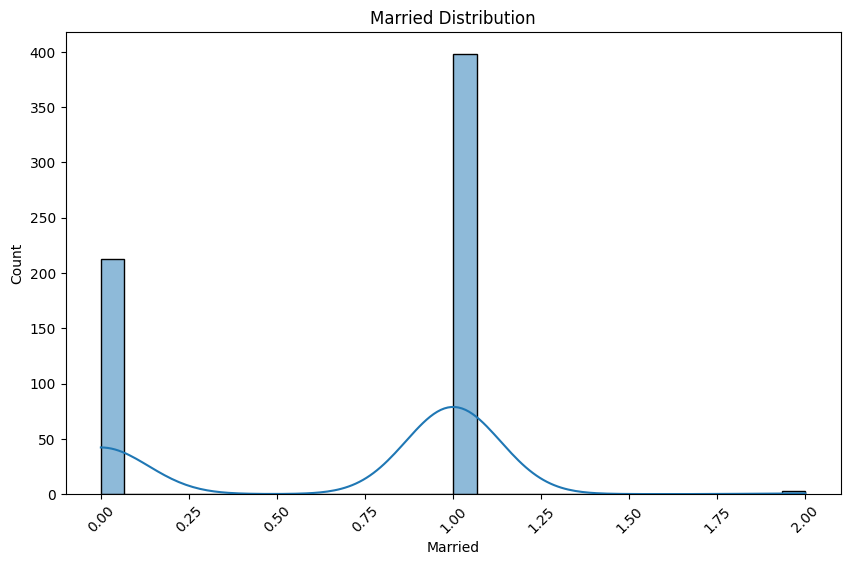

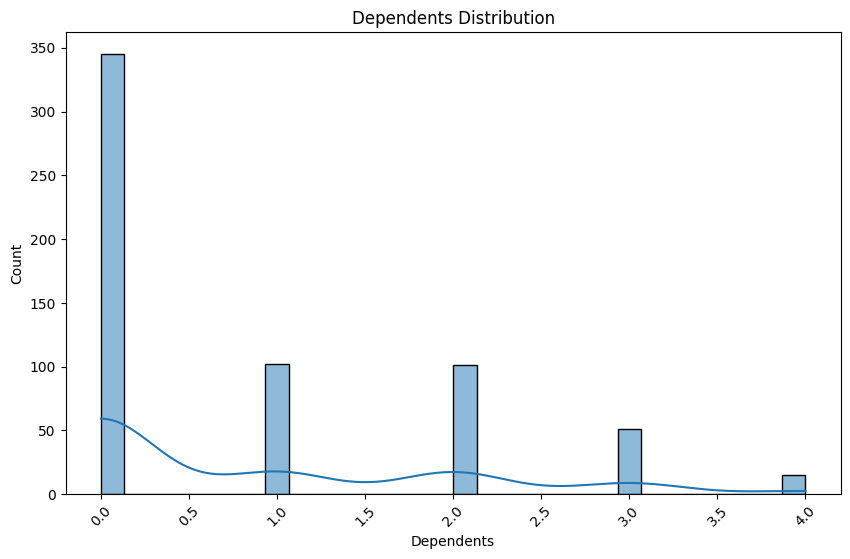

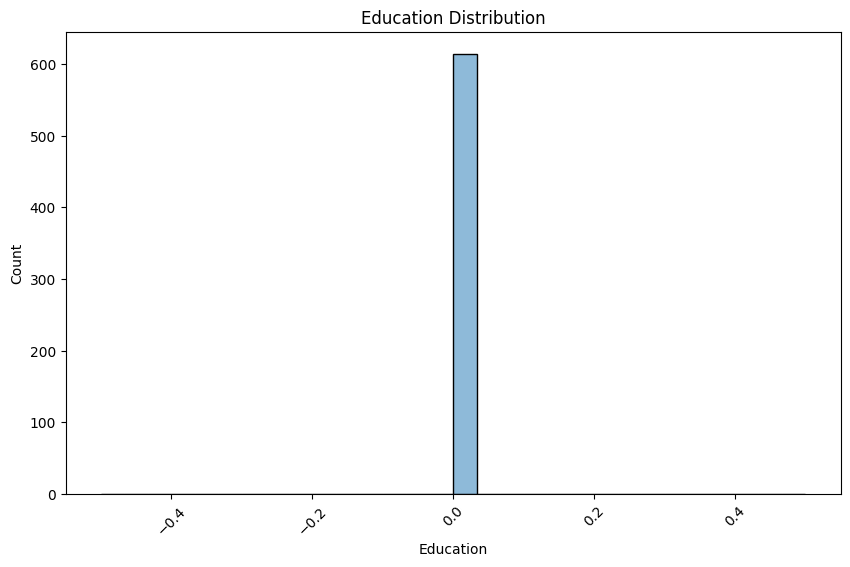

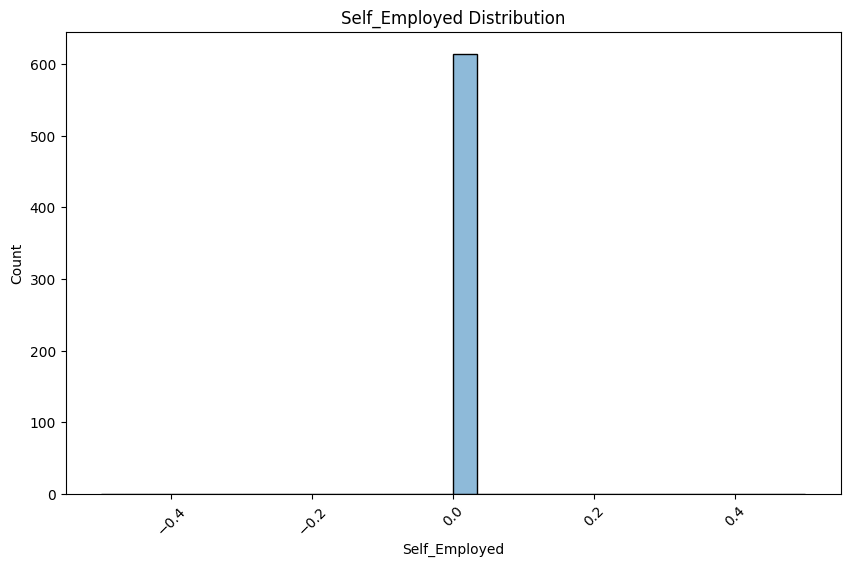

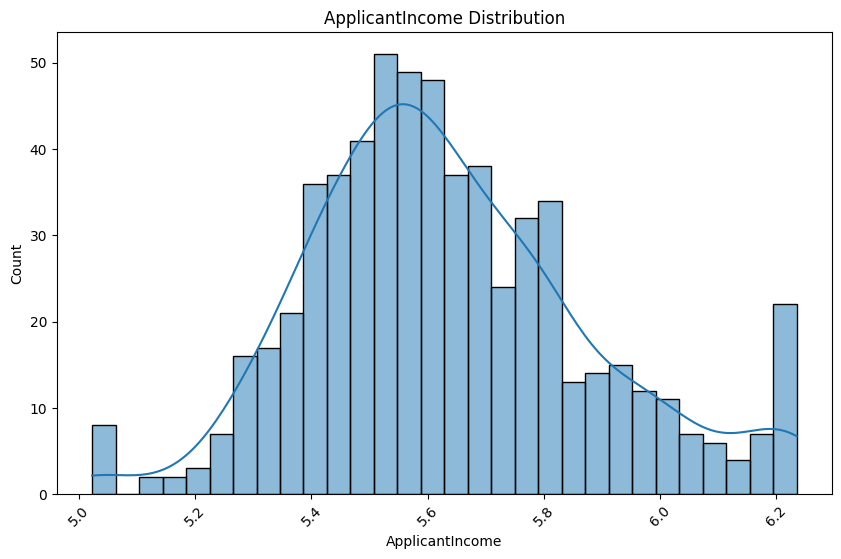

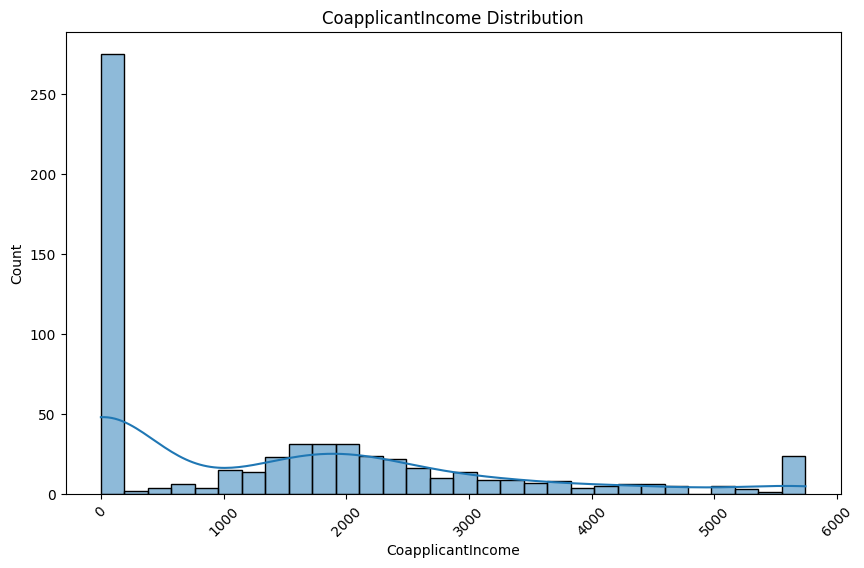

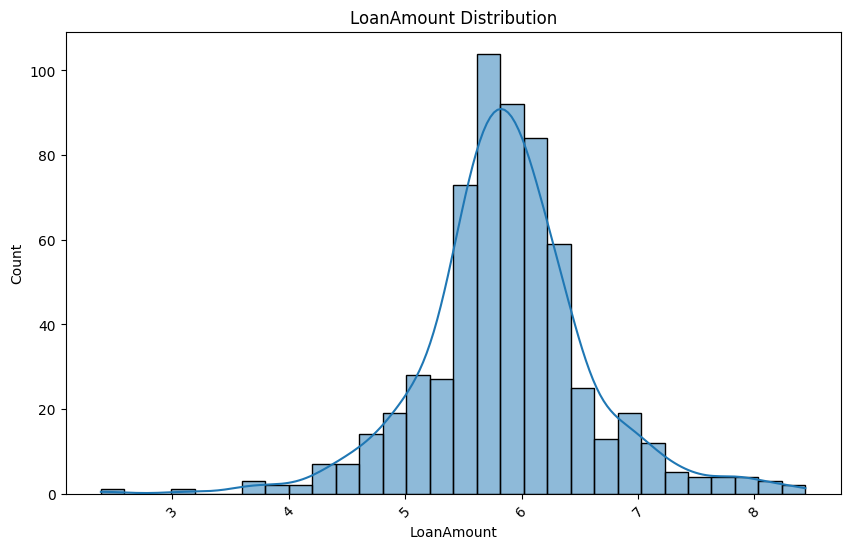

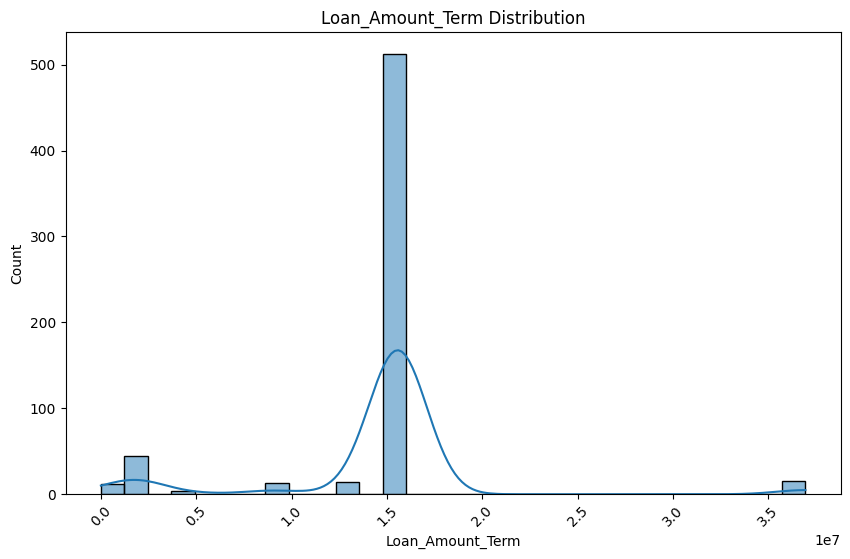

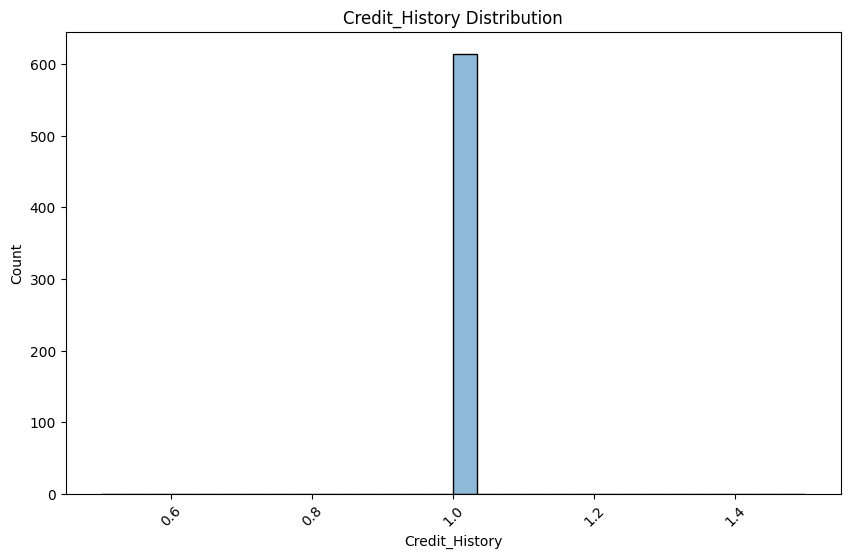

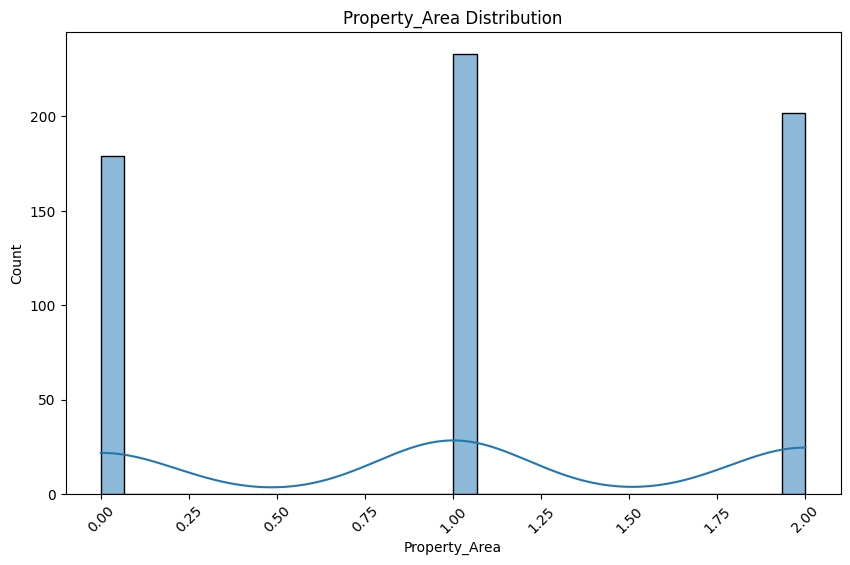

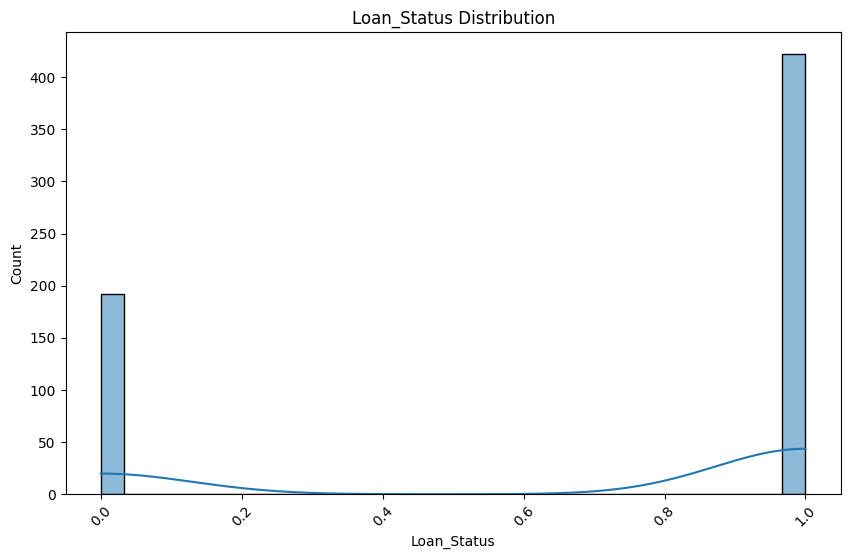

In [139]:

for i in df_copy1:

    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_copy1[i], kde=True, bins=30)
    plt.xticks(rotation=45)
    plt.title(f"{i} Distribution")
    plt.show()

In [140]:
df_copy1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5.784390,0.0,6.035000,1.558631e+07,1,2,1
1,1,1,1,0,0,5.681300,1508.0,5.841340,1.558631e+07,1,0,0
2,1,1,0,0,0,5.496075,0.0,4.914615,1.558631e+07,1,2,1
3,1,1,0,0,0,5.428743,2358.0,5.749027,1.558631e+07,1,2,1
4,1,0,0,0,0,5.795018,0.0,5.980529,1.558631e+07,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,5.480911,0.0,5.014562,1.558631e+07,1,0,1
610,1,1,3,0,0,5.634015,0.0,4.243627,1.947753e+06,1,0,1
611,1,1,1,0,0,5.916714,240.0,6.843402,1.558631e+07,1,2,1
612,1,1,2,0,0,5.891378,0.0,6.392580,1.558631e+07,1,2,1


In [141]:
df_num = df_copy1[[ 'Married', 'Dependents','Education','Self_Employed', 'Credit_History','Property_Area']]
df_cat= df_copy1[['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

In [142]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_copy1[df_num.columns] =scaler.fit_transform(df_copy1[df_num.columns])
df_copy1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0.0,0.00,0.0,0.0,5.784390,0.0,6.035000,1.558631e+07,0.0,1.0,1
1,1,0.5,0.25,0.0,0.0,5.681300,1508.0,5.841340,1.558631e+07,0.0,0.0,0
2,1,0.5,0.00,0.0,0.0,5.496075,0.0,4.914615,1.558631e+07,0.0,1.0,1
3,1,0.5,0.00,0.0,0.0,5.428743,2358.0,5.749027,1.558631e+07,0.0,1.0,1
4,1,0.0,0.00,0.0,0.0,5.795018,0.0,5.980529,1.558631e+07,0.0,1.0,1


In [143]:
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
df_copy1[df_cat.columns] =scaler.fit_transform(df_copy1[df_cat.columns])
df_copy1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0.0,0.00,0.0,0.0,0.628196,0.000000,0.602921,0.421818,0.0,1.0,1
1,1,0.5,0.25,0.0,0.0,0.543165,0.262575,0.570918,0.421818,0.0,0.0,0
2,1,0.5,0.00,0.0,0.0,0.390387,0.000000,0.417768,0.421818,0.0,1.0,1
3,1,0.5,0.00,0.0,0.0,0.334850,0.410578,0.555662,0.421818,0.0,1.0,1
4,1,0.0,0.00,0.0,0.0,0.636961,0.000000,0.593920,0.421818,0.0,1.0,1


In [144]:
df_copy1.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.0,614.0,614.000000,614.000000,614.000000,614.000000,614.0,614.000000,614.000000
mean,0.838762,0.328990,0.210505,0.0,0.0,0.504870,0.247200,0.575459,0.394297,0.0,0.518730,0.687296
std,0.421752,0.242486,0.280133,0.0,0.0,0.201559,0.282878,0.117509,0.148031,0.0,0.393741,0.463973
min,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.0,0.0,0.375000,0.000000,0.513537,0.421818,0.0,0.000000,0.000000
50%,1.000000,0.500000,0.000000,0.0,0.0,0.477600,0.206943,0.572762,0.421818,0.0,0.500000,1.000000
75%,1.000000,0.500000,0.500000,0.0,0.0,0.625000,0.400000,0.631286,0.421818,0.0,1.000000,1.000000
max,2.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [145]:
df_copy1.nunique()

Gender                 3
Married                3
Dependents             5
Education              1
Self_Employed          1
ApplicantIncome      486
CoapplicantIncome    271
LoanAmount           204
Loan_Amount_Term      11
Credit_History         1
Property_Area          3
Loan_Status            2
dtype: int64

In [146]:
married_column = "Married"
mean=df_copy1[married_column].mean()
median = df_copy1[married_column].median()
mode= df_copy1[married_column].mode()[0]
variance= df_copy1[married_column].var()
std_dev= df_copy1[married_column].std()

print(f"Mean: {mean}\nMedian: {median}\nMode: {mode}\nVariance: {variance}\nStandard Deviation: {std_dev}")

Mean: 0.3289902280130293
Median: 0.5
Mode: 0.5
Variance: 0.058799304961448744
Standard Deviation: 0.2424856799100696


In [147]:

print(f'Mean: {mean}\nMedian: {median}\nMode: {mode}')

Mean: 0.3289902280130293
Median: 0.5
Mode: 0.5


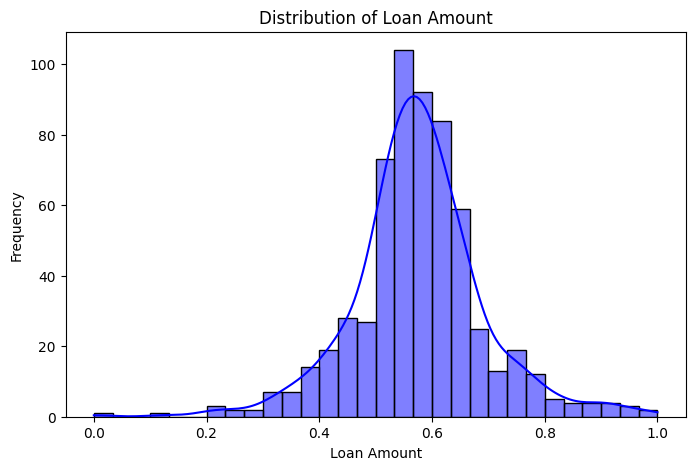

In [148]:
# Plot histogram and KDE
plt.figure(figsize=(8, 5))
sns.histplot(df_copy1['LoanAmount'], bins=30, kde=True, color="blue")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Loan Amount")
plt.show()


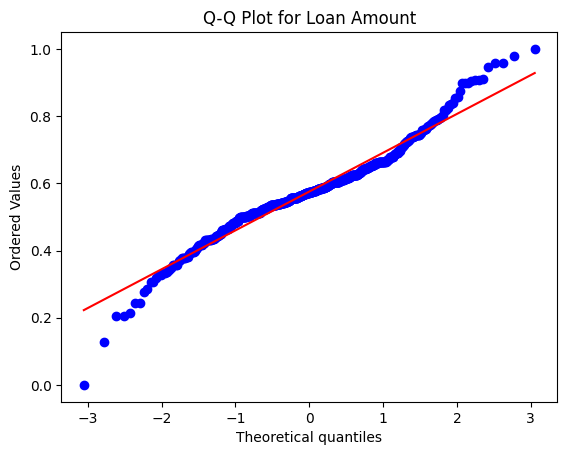

Shapiro-Wilk Test p-value: 1.7442265167231297e-11


In [149]:
# Q-Q plot (Quantile-Quantile plot)
stats.probplot(df_copy1['LoanAmount'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Loan Amount")
plt.show()

# Shapiro-Wilk Test for normality
shapiro_test = stats.shapiro(df_copy1['LoanAmount'])
print(f"Shapiro-Wilk Test p-value: {shapiro_test.pvalue}")


In [150]:
# Skewness and Kurtosis
skewness = df_copy1['LoanAmount'].skew()
kurtosis = df_copy1['LoanAmount'].kurt()

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")


Skewness: 0.03045813232370493
Kurtosis: 2.448058789283614


                   ApplicantIncome  CoapplicantIncome  LoanAmount
ApplicantIncome           1.000000          -0.248508    0.515101
CoapplicantIncome        -0.248508           1.000000    0.256486
LoanAmount                0.515101           0.256486    1.000000


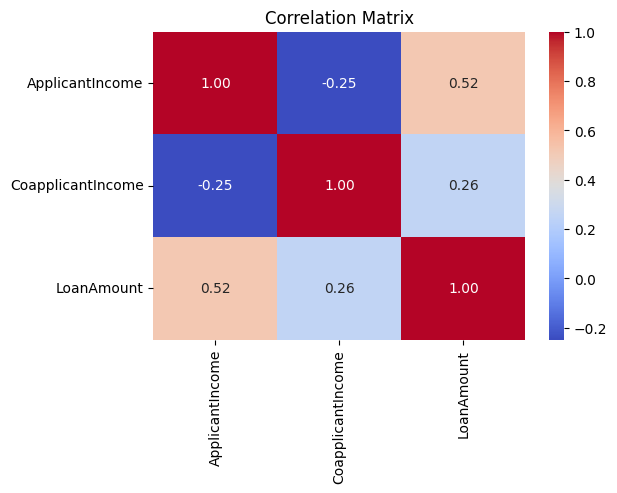

In [151]:

# Compute correlation matrix
correlation_matrix = df_copy1[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].corr()

# Print correlation values
print(correlation_matrix)

# Heatmap for visualization
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [152]:

# Create a contingency table
contingency_table = pd.crosstab(df_copy1['Gender'], df_copy1['Loan_Status'])
print(contingency_table)


Loan_Status    0    1
Gender               
0             37   75
1            150  339
2              5    8


In [153]:
# Perform Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Statistic: 0.5558960103285638
P-Value: 0.7573361980618397
Degrees of Freedom: 2


In [154]:
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 57.7 KB


<Axes: xlabel='Dependents', ylabel='count'>

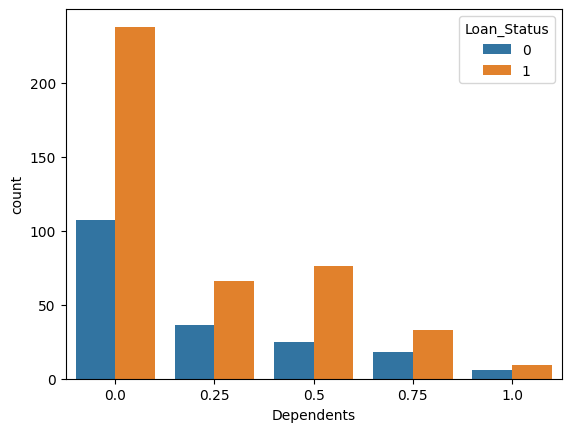

In [155]:
sns.countplot(x='Dependents', hue='Loan_Status', data=df_copy1)

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
# Define features and target variable
X = df_copy1.drop(columns=['Loan_Status'])
y = df_copy1['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=42)

In [158]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 449 to 102
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             564 non-null    int64  
 1   Married            564 non-null    float64
 2   Dependents         564 non-null    float64
 3   Education          564 non-null    float64
 4   Self_Employed      564 non-null    float64
 5   ApplicantIncome    564 non-null    float64
 6   CoapplicantIncome  564 non-null    float64
 7   LoanAmount         564 non-null    float64
 8   Loan_Amount_Term   564 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      564 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 52.9 KB


In [159]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 350 to 548
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             50 non-null     int64  
 1   Married            50 non-null     float64
 2   Dependents         50 non-null     float64
 3   Education          50 non-null     float64
 4   Self_Employed      50 non-null     float64
 5   ApplicantIncome    50 non-null     float64
 6   CoapplicantIncome  50 non-null     float64
 7   LoanAmount         50 non-null     float64
 8   Loan_Amount_Term   50 non-null     float64
 9   Credit_History     50 non-null     float64
 10  Property_Area      50 non-null     float64
dtypes: float64(10), int64(1)
memory usage: 4.7 KB


In [160]:
from sklearn.linear_model import LogisticRegression


In [161]:
model = LogisticRegression()

In [162]:
model.fit(X_train,y_train)

LogisticRegression()

In [163]:
model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [164]:
model.score(X_test,y_test)

0.74

In [165]:
model.predict_proba(X_test)

array([[0.26975982, 0.73024018],
       [0.27193888, 0.72806112],
       [0.33202815, 0.66797185],
       [0.35386083, 0.64613917],
       [0.37556118, 0.62443882],
       [0.31924928, 0.68075072],
       [0.31594575, 0.68405425],
       [0.25134918, 0.74865082],
       [0.36949459, 0.63050541],
       [0.30221032, 0.69778968],
       [0.29606259, 0.70393741],
       [0.29340186, 0.70659814],
       [0.40723725, 0.59276275],
       [0.33330044, 0.66669956],
       [0.28894454, 0.71105546],
       [0.23837358, 0.76162642],
       [0.35775414, 0.64224586],
       [0.3723245 , 0.6276755 ],
       [0.29816421, 0.70183579],
       [0.22647477, 0.77352523],
       [0.27437198, 0.72562802],
       [0.318606  , 0.681394  ],
       [0.31100465, 0.68899535],
       [0.2931193 , 0.7068807 ],
       [0.29631563, 0.70368437],
       [0.38085544, 0.61914456],
       [0.32158951, 0.67841049],
       [0.38590611, 0.61409389],
       [0.38492467, 0.61507533],
       [0.28739272, 0.71260728],
       [0.